# Daten importieren

In [26]:
import pandas as pd

# Schritt 1: Lese die entsprechende Datei ein, speichere die Daten in der Variable 'df' ab und gib sie anschließend aus.
df = pd.read_csv("daily_covid_19_infections.csv", parse_dates=["Date"], index_col="Date")
df = df.asfreq('D')
df

,new_infections
Date,
2020-11-15,0.0
2020-11-16,0.0
2020-11-17,0.0
2020-11-18,0.0
2020-11-19,0.0
...,...
2021-03-10,120.0
2021-03-11,84.0
2021-03-12,61.0


# Daten visualisieren

<Axes: xlabel='Date', ylabel='new_infections'>

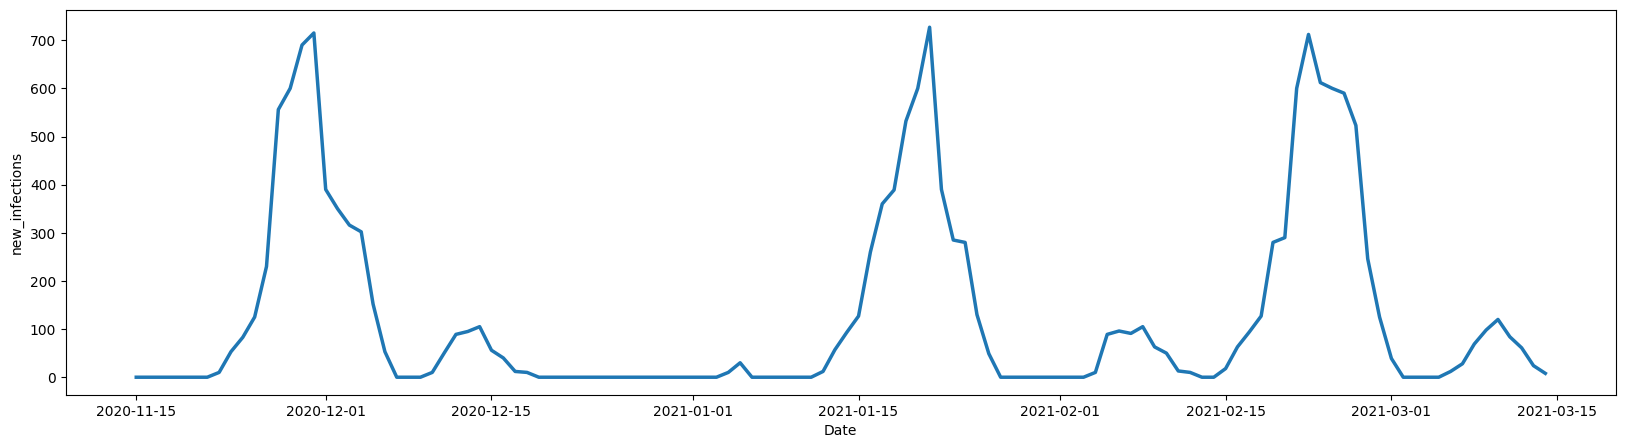

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Schritt 2: Visualisiere die Daten mithilfe eines Lineplots.
plt.figure(figsize=(20,5))
sns.lineplot(x=df.index, y=df["new_infections"], linewidth=2.5)

# Lag-Features

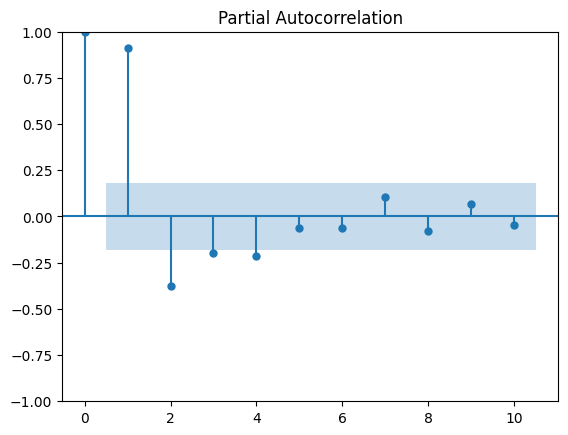

In [28]:
from statsmodels.graphics.tsaplots import plot_pacf

# Schritt 3: Bestimme mithilfe von plot_pacf die optimale Anzahl an Lag-Features.
plot_pacf(df["new_infections"], lags=10)
plt.show()

In [31]:
y = df["new_infections"]

# Schritt 4: Erstelle die entsprechenden Lag-Features basierend auf den Ergebnissen aus Schritt 3 und ersetze die fehlenden Werte mit 0.
X = pd.DataFrame({
    'lag_4': y.shift(4),
    'lag_3': y.shift(3),
    'lag_2': y.shift(2),
    'lag_1': y.shift(1)
}).fillna(0)

In [32]:
X

,lag_4,lag_3,lag_2,lag_1
Date,,,,
2020-11-15,0.0,0.0,0.0,0.0
2020-11-16,0.0,0.0,0.0,0.0
2020-11-17,0.0,0.0,0.0,0.0
2020-11-18,0.0,0.0,0.0,0.0
2020-11-19,0.0,0.0,0.0,0.0
...,...,...,...,...
2021-03-10,12.0,28.0,69.0,98.0
2021-03-11,28.0,69.0,98.0,120.0
2021-03-12,69.0,98.0,120.0,84.0


# Daten aufteilen

In [33]:
from sklearn.model_selection import train_test_split

#Schritt 5: Unterteile die Daten in Trainings- und Testdaten, wobei die Testdaten 20% der Gesamtdaten ausmachen sollten.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

# Modell trainieren

In [34]:
from sklearn.linear_model import LinearRegression

# Schritt 6: Erstelle eine Instanz eines linearen Regressionsmodells und trainiere dieses Modell auf den Trainingsdaten.
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Modell visualisieren

In [35]:
# Schritt 7: Nutze das trainierte Modell, um Vorhersagen für die Trainingsdaten zu generieren.
train_predictions = model.predict(X_train)

<Axes: xlabel='Date', ylabel='new_infections'>

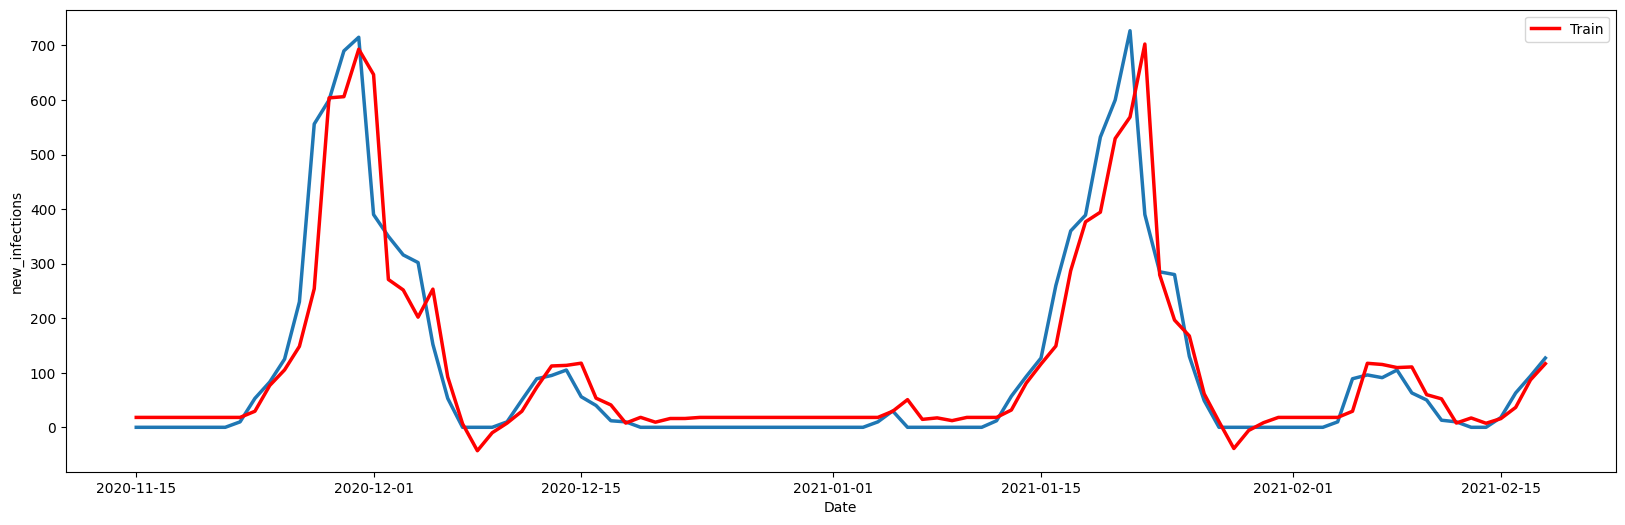

In [36]:
# Schritt 8: Visualisiere die Trainingsdaten und das Modell jeweils mit einem Lineplot.
plt.figure(figsize=(20, 6))
sns.lineplot(x=X_train.index, y=y_train, linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")

# Vorhersage auf den Testdaten

In [37]:
# Schritt 9: Nutze das trainierte Modell, um Vorhersagen für die Testdaten zu generieren.
test_predictions = model.predict(X_test)

# Modellbewertung

In [38]:
from sklearn.metrics import mean_absolute_error

# Schritt 10: Berechne den Mean Absolute Error (MAE) basierend auf den Vorhersagen und den Testdaten.
mae = mean_absolute_error(test_predictions, y_test)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 49.739295224244465


<Axes: xlabel='Date', ylabel='new_infections'>

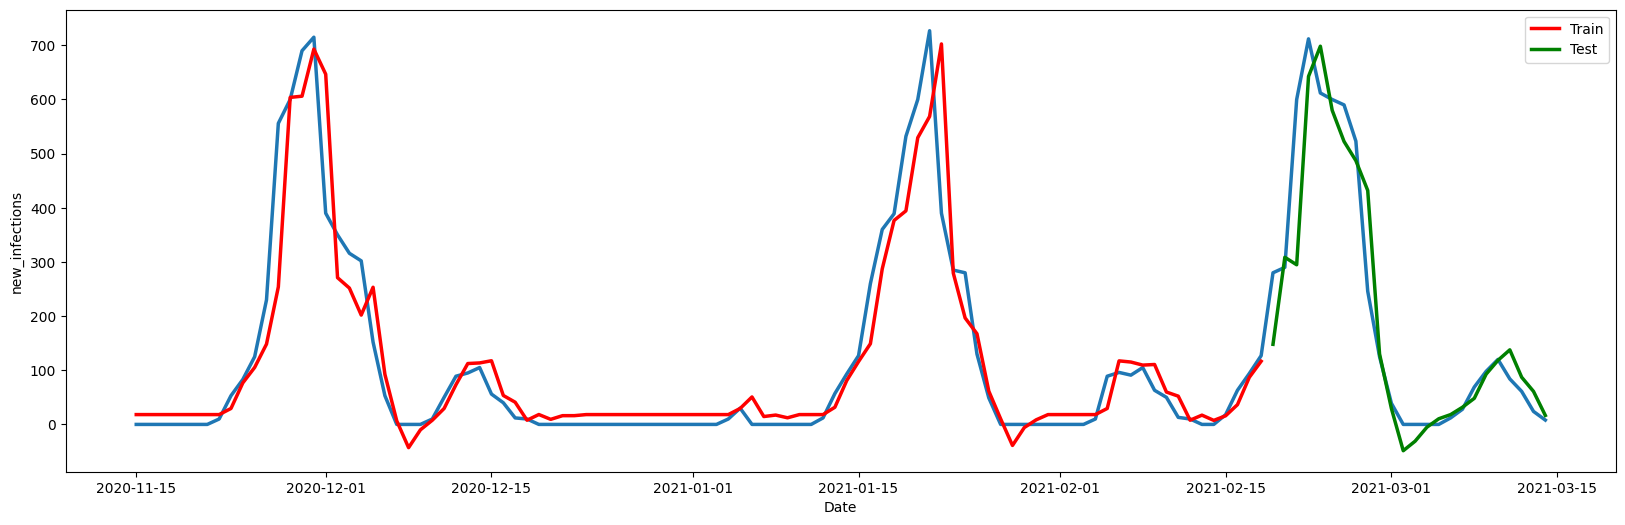

In [39]:
# Schritt 11: Visualisiere die gesamten Daten, das Modell und die Vorhersagen für die Testdaten jeweils mit einem Lineplot.
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df["new_infections"], linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=test_predictions, color="green", linewidth=2.5, label="Test")

# Rekursive Ausgaben

In [40]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")

def make_predictions(trained_model, X_init, length):
  predictions = []
  for _ in range(length):
      y_pred = trained_model.predict(X_init)
      predictions.append(y_pred[0])
      X_init = np.roll(X_init, -1)
      X_init[0, -1] = y_pred[0]

  return predictions

# Schritt 12: Definiere X_init entsprechend, um die rekursiven Vorhersagen 'recursive_test_predictions' zu bestimmen.
X_init = np.roll(X_train.iloc[-1:], -1)
X_init[0, -1] = y_train[-1]

recursive_test_predictions = make_predictions(model, X_init, len(X_test))

In [41]:
# Schritt 13: Berechne den Mean Absolute Error (MAE) basierend auf den rekursiven Vorhersagen und den Testdaten.
recursive_mae = mean_absolute_error(recursive_test_predictions, y_test)
print("Mean Absolute Error:", recursive_mae)

Mean Absolute Error: 170.71523655526676


<Axes: xlabel='Date', ylabel='new_infections'>

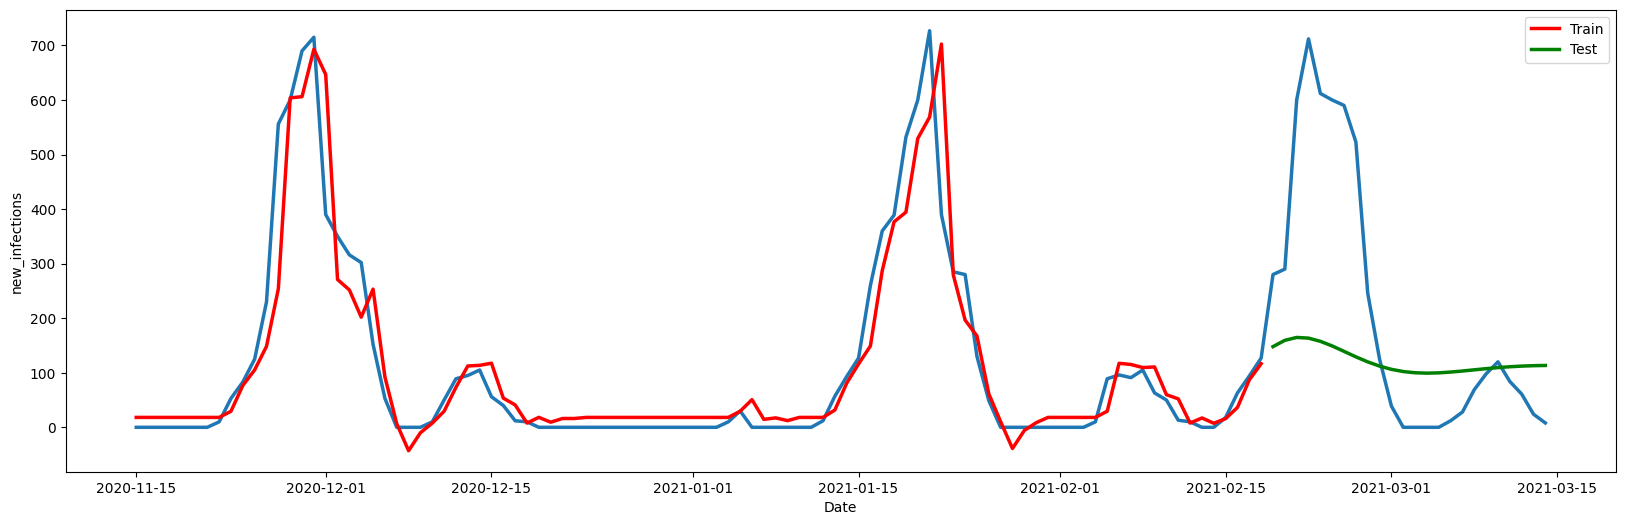

In [42]:
# Schritt 14: Visualisiere die gesamten Daten, das Modell und die rekursiven Vorhersagen für die Testdaten jeweils mit einem Lineplot.
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df["new_infections"], linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=recursive_test_predictions, color="green", linewidth=2.5, label="Test")

In [43]:
# Schritt 15: Führe diese Zelle aus, um die rekursiven Vorhersagen 'recursive_forecast_predictions' zu bestimmen und den 'forecast_index' zu definieren.
recursive_forecast_predictions = make_predictions(model, [recursive_test_predictions[-4:]], 30)
forecast_index = pd.date_range(start=X_test.index[-1], periods=31, freq='D')[1:]

<Axes: xlabel='Date', ylabel='new_infections'>

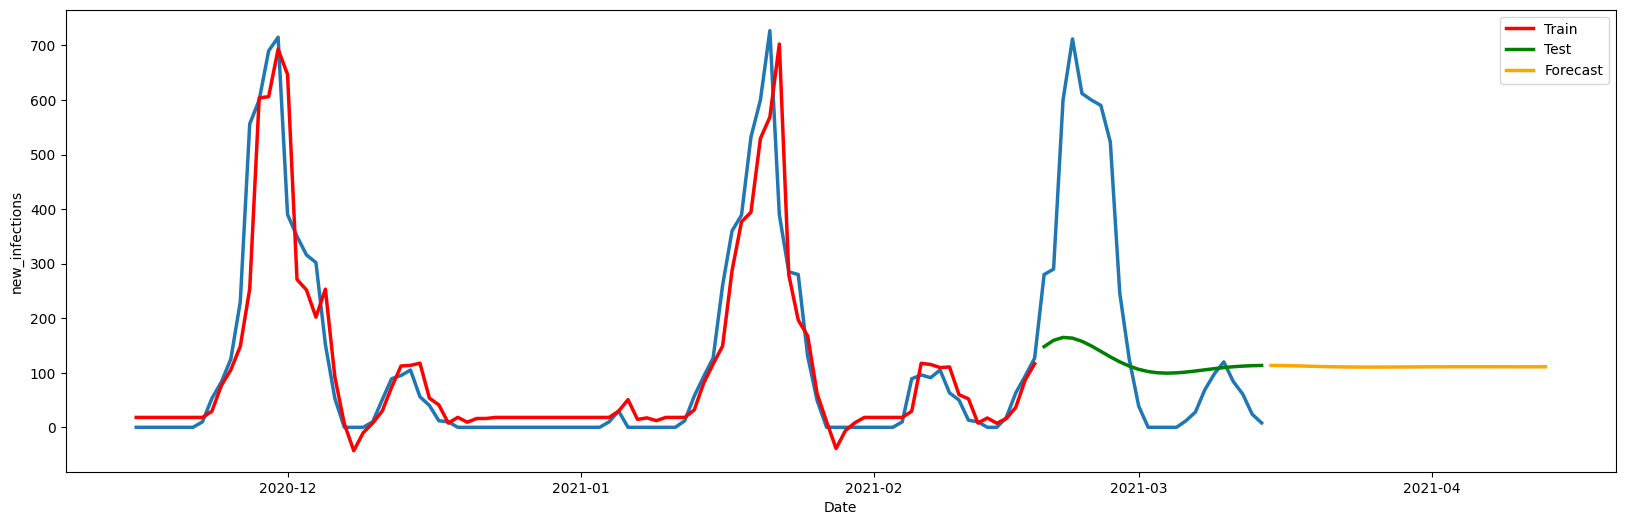

In [44]:
# Schritt 16: Visualisiere alle Plots aus Schritt 14 und füge zusätzlich 'recursive_forecast_predictions' hinzu.
plt.figure(figsize=(20, 6))
sns.lineplot(x=df.index, y=df["new_infections"], linewidth=2.5)
sns.lineplot(x=X_train.index, y=train_predictions, color="red", linewidth=2.5, label="Train")
sns.lineplot(x=X_test.index, y=recursive_test_predictions, color="green", linewidth=2.5, label="Test")
sns.lineplot(x=forecast_index, y=recursive_forecast_predictions, color="orange", linewidth=2.5, label="Forecast")

# Mehrfachausgaben

In [45]:
# Schritt 17: Vervollständige den folgenden Code, um Mehrfachausgaben (multioutputs) zu ermöglichen.
y_multioutput = pd.DataFrame({
    'y': y,
    'future_1': y.shift(-1),
    'future_2': y.shift(-2),
    'future_3': y.shift(-3),
    'future_4': y.shift(-4),
    'future_5': y.shift(-5),
    'future_6': y.shift(-6),
}).fillna(0)

y_multioutput

,y,future_1,future_2,future_3,future_4,future_5,future_6
Date,,,,,,,
2020-11-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-11-16,0.0,0.0,0.0,0.0,0.0,0.0,10.0
2020-11-17,0.0,0.0,0.0,0.0,0.0,10.0,53.0
2020-11-18,0.0,0.0,0.0,0.0,10.0,53.0,83.0
2020-11-19,0.0,0.0,0.0,10.0,53.0,83.0,125.0
...,...,...,...,...,...,...,...
2021-03-10,120.0,84.0,61.0,24.0,8.0,0.0,0.0
2021-03-11,84.0,61.0,24.0,8.0,0.0,0.0,0.0
2021-03-12,61.0,24.0,8.0,0.0,0.0,0.0,0.0


In [48]:
# Schritt 18: Teile die Variable y_multioutput anhand des .loc-Operators in Trainings- und Testdaten auf. Verwende hierbei den Index von X_train und X_test als Orientierung.
y_multioutput_train = y_multioutput.loc[X_train.index]
y_multioutput_test = y_multioutput.loc[X_test.index]

In [49]:
# Schritt 19: Erstelle eine Instanz eines linearen Regressionsmodells und trainiere dieses Modell auf X_train und y_multioutput_train.
multioutput_model = LinearRegression()
multioutput_model.fit(X_train, y_multioutput_train)

LinearRegression()

In [50]:
# Schritt 20: Nutze das trainierte Modell 'multioutput_model', um Vorhersagen für die Trainingsdaten zu generieren.
multioutput_train_predictions = multioutput_model.predict(X_train)

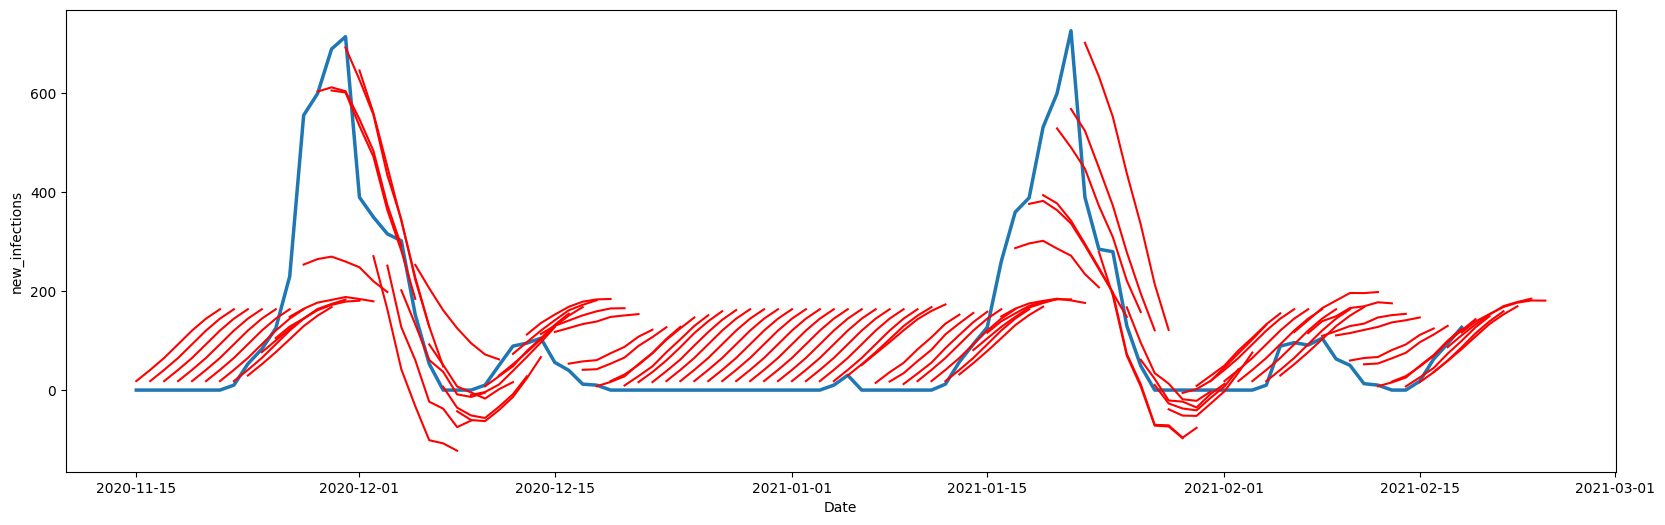

In [52]:
# Schritt 21: Führe diese Zelle aus, um die Vorhersagen für die Trainingsdaten zu visualisieren.
streched_train_index = pd.date_range(start=X_train.index[0], periods=len(X_train)+6, freq='D')

plt.figure(figsize=(20, 6))
sns.lineplot(x=X_train.index, y=y_train, linewidth=2.5)

for i in range(len(X_train)):
    sns.lineplot(x=streched_train_index[i:i+7], y=multioutput_train_predictions[i, :], color="red")

In [53]:
# Schritt 22: Nutze das trainierte Modell 'multioutput_model', um Vorhersagen für die Testdaten zu generieren.
multioutput_test_predictions = multioutput_model.predict(X_test)

In [54]:
# Schritt 23: Berechne den Mean Absolute Error (MAE) basierend auf den Vorhersagen 'multioutput_test_predictions' und den Testdaten 'y_multioutput_test'.
multioutput_mae = mean_absolute_error(multioutput_test_predictions, y_multioutput_test)
print("Mean Absolute Error:", multioutput_mae)

Mean Absolute Error: 103.34619508090239


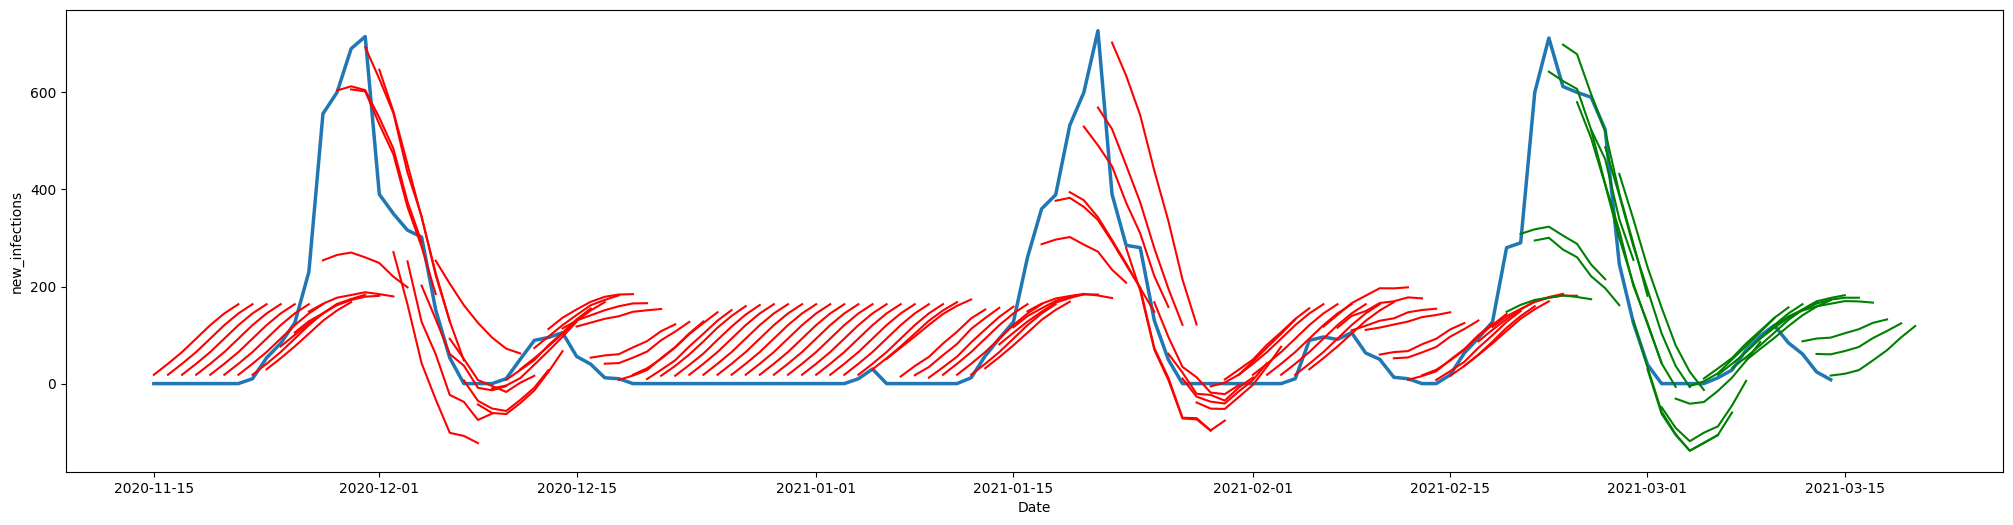

In [55]:
# Schritt 24: Führe diese Zelle aus, um die Vorhersagen für die Trainings- und Testdaten zu visualisieren.
streched_test_index = pd.date_range(start=X_test.index[0], periods=len(X_test)+6, freq='D')

plt.figure(figsize=(25, 6))
sns.lineplot(x=X.index, y=y, linewidth=2.5)

for i in range(len(X_train)):
    sns.lineplot(x=streched_train_index[i:i+7], y=multioutput_train_predictions[i, :], color="red")

for i in range(len(X_test)):
    sns.lineplot(x=streched_test_index[i:i+7], y=multioutput_test_predictions[i, :], color="green")